Prashant Singh

Exercise 1.1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [31]:
def logistic_map(r_value, initial_pop, n, return_whole = False):
    list_ = []

    for i in range(n):
        if i == 0:
            temp = initial_pop*(1-initial_pop)
            f_next = r_value.T * temp
            list_.append(f_next)
   
        else:
            temp = f_next*(1-f_next)

            f_next = temp*r_value.T
            list_.append(f_next)

    if return_whole == False:
        return list_[-1]
    else: 
        return np.array(list_)

In [32]:
# giving r starting with 0.2 and increment of 0.1
rVal = np.arange(0.5,4,0.1)

# initial population fraction 
initPopulationFraction  = np.array([[0.1,0.2,0.5]])

# number of iteration
n = 100

In [33]:
# run the logistic mapping in one go
data = logistic_map(np.expand_dims(rVal,0), initPopulationFraction, n, return_whole=True)

In [34]:
def evolution(r=None,p=None,dataframe_passed = False):
    plt.figure(figsize= (12,4))
    # to check if need to plot from the original data or any particular series
    if dataframe_passed == False:
        r_index = np.where(rVal.round(2) == r)[0][0]
        p_index = np.where(initPopulationFraction.round(2) == p)[1][0]
        plt.figure(figsize= (12,4))
        plt.plot(data[:,r_index,p_index])
        plt.xlabel(r'$timestep_{n}$')
        plt.ylabel(r'$X_{n}$')
        plt.title('population evolution r:{}    X_o: {}'.format(r,p))
        plt.show()
    else:
        plt.plot(p[r])
        plt.xlabel(r'$timestep_{n}$')
        plt.ylabel(r'$X_{n}$')
        plt.title('population evolution r:{}'.format(r))
        plt.show()
        


<Figure size 864x288 with 0 Axes>

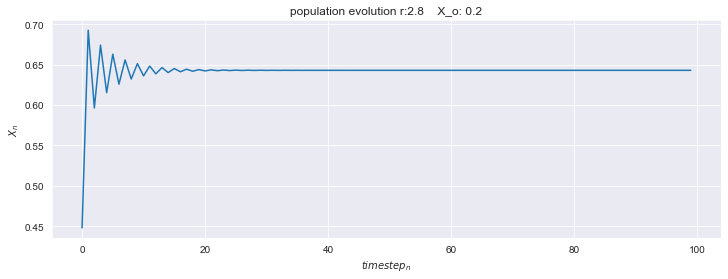

In [35]:
evolution(2.8,0.2)

In [36]:
def cobweb_plot(r,p):
    plt.figure(figsize= (12,10))

    # plot the Y=X line
    n_array = np.linspace(0,1,200)
    plt.plot(n_array,n_array)

    # plot logistic parametric plot
    logistic_graph = logistic_map(np.array([[r]]),np.expand_dims(n_array,-1), 1, return_whole = True)
    plt.plot(n_array, logistic_graph[0,:,:])

    
    # cobweb plot
    r_index = np.where(rVal.round(2) == r)[0][0]
    p_index = np.where(initPopulationFraction.round(2) == p)[1][0]

    logistic_array = data[:,r_index,p_index]
    logistic_array = [p] + (logistic_array.reshape(logistic_array.shape[0]).tolist())

    for i in range(len(logistic_array) -1):
        plt.vlines(x=np.round(logistic_array[i],6), ymin=np.round(logistic_array[i],6), ymax=np.round(logistic_array[i+1], 6), color='black')
        plt.hlines(y=np.round(logistic_array[i+1],6), xmin=np.round(logistic_array[i],6), xmax=np.round(logistic_array[i+1], 6),color = 'black')

        
    plt.legend([r'$Y = X_{n}$','Logistic Map','CobWeb Plot'])
    plt.title('Cobweb Plot R: {} X_o: {}'.format(r,p))

    plt.show()
    
    

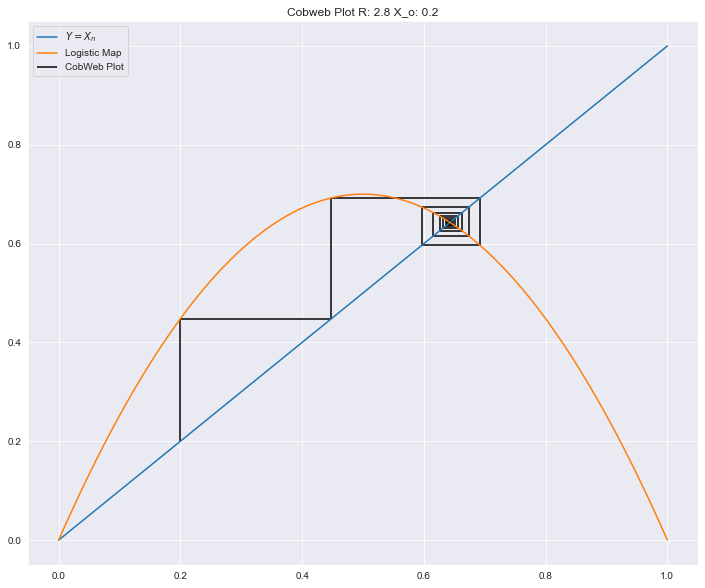

In [37]:
cobweb_plot(2.8,0.2)

In [38]:
# giving r starting with 0.8 and increment of 0.01
rVal = np.arange(0.8,4,0.01)

# initial population fraction 
initPopulationFraction  = np.array([[0.5]])

# number of iteration
n = 400

In [39]:
# run the logistic mapping in one go
df = logistic_map(np.expand_dims(rVal,0), initPopulationFraction, n, return_whole=True)
df = pd.DataFrame(df.reshape(df.shape[0],df.shape[1]), columns=rVal.round(3))

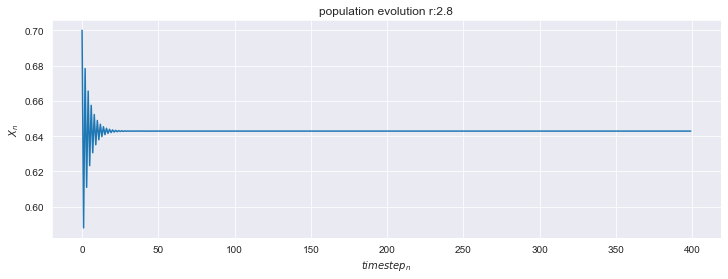

In [40]:
evolution(2.8,df,dataframe_passed=True)

In [41]:
def phase_diagram(df):
    temp = df.round(6)
    placeholder = {}
    plt.figure(figsize= (12,5))

    for r in df.columns:

        count_check = temp[r].iloc[100:].value_counts()
        count_check = count_check[count_check >1].to_dict()
        plt.scatter(np.full((len(temp[r].iloc[100:]),),r),temp[r].iloc[100:], s= 0.3, c = 'black')
        placeholder[r] = count_check

    plt.xlabel(r'$r$')
    plt.ylabel(r'$X_{n}$')
    plt.title('Bifurcation/Phase diagram X_o: {}'.format(0.5))
    plt.show()

    return placeholder


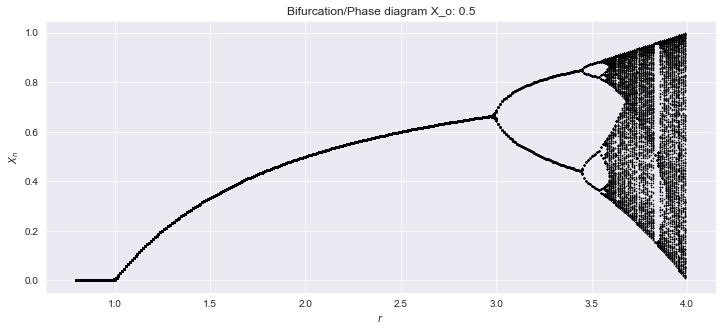

In [42]:
temp = phase_diagram(df)

In [43]:
# period doubling
# giving r starting with 1 and increment of 0.001
rVal = np.arange(1,4,0.001)

# initial population fraction 
initPopulationFraction  = np.array([[0.5]])

# number of iteration
n = 200

# run the logistic mapping in one go
df = logistic_map(np.expand_dims(rVal,0), initPopulationFraction, n, return_whole=True)
df = pd.DataFrame(df.reshape(df.shape[0],df.shape[1]), columns=rVal.round(4))

In [17]:
def truncate(f_val, n):
    return np.floor(f_val * 10 ** n) / 10 ** n

In [18]:
def period_doubling(df):
    # temp = df.round()
    placeholder = {}
    # plt.figure(figsize= (12,5))

    for r in df.columns:

        count_check = df[r].iloc[100:].value_counts()
        count_check = count_check[count_check >1].to_dict()
        # plt.scatter(np.full((len(temp[r].iloc[100:]),),r),temp[r].iloc[100:], s= 0.3, c = 'black')
        placeholder[r] = count_check

    # plt.xlabel(r'$r$')
    # plt.ylabel(r'$X_{n}$')
    # plt.title('Bifurcation/Phase diagram X_o: {}'.format(0.5))
    # plt.show()

    return placeholder


In [22]:
truncated_df = truncate(df,8)
bifurcations = period_doubling(truncated_df)
length_dict = {}
for key, value in bifurcations.items():
    print(key,value)
    if len(value)>1:
        length_dict[key] = len(value)
    # length_dict = {key: len(value)


1.0 {}
1.001 {}
1.002 {}
1.003 {}
1.004 {}
1.005 {}
1.006 {}
1.007 {}
1.008 {}
1.009 {}
1.01 {}
1.011 {}
1.012 {}
1.013 {}
1.014 {}
1.015 {}
1.016 {}
1.017 {}
1.018 {}
1.019 {}
1.02 {}
1.021 {}
1.022 {}
1.023 {}
1.024 {}
1.025 {}
1.026 {}
1.027 {}
1.028 {}
1.029 {}
1.03 {}
1.031 {}
1.032 {}
1.033 {}
1.034 {}
1.035 {}
1.036 {}
1.037 {}
1.038 {}
1.039 {}
1.04 {}
1.041 {}
1.042 {}
1.043 {}
1.044 {}
1.045 {}
1.046 {}
1.047 {}
1.048 {}
1.049 {}
1.05 {}
1.051 {}
1.052 {}
1.053 {}
1.054 {}
1.055 {}
1.056 {}
1.057 {}
1.058 {}
1.059 {}
1.06 {}
1.061 {}
1.062 {0.05838056: 2}
1.063 {0.05926633: 2}
1.064 {0.06015048: 2, 0.06015046: 2}
1.065 {0.06103293: 2, 0.06103294: 2, 0.06103296: 2}
1.066 {0.06191377: 2, 0.06191378: 2, 0.0619138: 2, 0.06191376: 2, 0.06191375: 2}
1.067 {0.06279293: 3, 0.06279292: 3, 0.06279297: 2, 0.06279294: 2, 0.062793: 2, 0.06279295: 2}
1.068 {0.06367045: 4, 0.06367047: 3, 0.06367052: 2, 0.06367046: 2, 0.0636705: 2, 0.06367048: 2}
1.069 {0.06454634: 4, 0.06454636: 3, 0.064546

In [26]:
# after eyeballing the r0, r1 and r2 are selected, which can be verified from the bifurcations or lenght_dict
(3.469 - 3.064)/(3.551 -3.469)

4.939024390243882